<a href="https://colab.research.google.com/github/Skander28/Models/blob/main/5Dialects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
fi_df = pd.read_csv('/content/drive/MyDrive/train_labeled.tsv', sep='\t')

In [3]:
tweets_mag = fi_df[fi_df['#3 country_label'].isin(['Tunisia','Algeria','Morocco','Libya','Mauritania'])]

In [4]:
tweets_mag['#3 country_label'].value_counts()

Algeria       1491
Morocco       1070
Libya         1070
Tunisia        750
Mauritania     210
Name: #3 country_label, dtype: int64

In [5]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(tweets_mag.drop('#3 country_label', axis=1), tweets_mag['#3 country_label'])
tweets_mag = pd.concat([X_resampled, y_resampled], axis=1)

In [6]:
tweets_mag['#3 country_label'].value_counts()

Morocco       1491
Libya         1491
Mauritania    1491
Algeria       1491
Tunisia       1491
Name: #3 country_label, dtype: int64

In [7]:
import pandas as pd
tweets_ids = pd.read_csv('/content/drive/MyDrive/maghrebi/dialect_dataset.csv')
     
# Read the given dataset which contain the Ids and the labels
df_clean = pd.read_csv('/content/drive/MyDrive/maghrebi/messages.csv',
                 lineterminator='\n')

column_names = ['id', 'tweets']  # list of column names

df_clean.columns = column_names

In [8]:
tweets_dataset = pd.merge(tweets_ids, df_clean, on='id', how='inner')

In [9]:
filtered_df = tweets_dataset[tweets_dataset['dialect'].isin(['TN','DZ','MA','LY'])]

In [10]:
filtered_df['dialect'].replace({'LY': 'Libya', 'DZ': 'Algeria', 'MA': 'Morocco', 'TN': 'Tunisia'}, inplace=True)

<ipython-input-10-09ba486c7982>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dialect'].replace({'LY': 'Libya', 'DZ': 'Algeria', 'MA': 'Morocco', 'TN': 'Tunisia'}, inplace=True)


In [11]:
tweets_maghrebi = tweets_mag.rename(columns={'#1 tweet_ID': 'id', '#2 tweet_content': 'tweets', '#3 country_label': 'dialect'})
tweets_maghrebi.drop('#4 province_label', axis=1, inplace=True)

In [12]:
dialect_dfs = {}

# Loop over unique dialects and add rows to corresponding dialect DataFrame
for dialect in filtered_df['dialect'].unique():
    dialect_df = filtered_df[filtered_df['dialect'] == dialect]
    new_dialect_df = tweets_maghrebi[tweets_maghrebi['dialect'] == dialect]
    dialect_df = pd.concat([dialect_df, new_dialect_df])
    dialect_dfs[dialect] = dialect_df

# Add a new dialect to the dictionary of dialect DataFrames
new_dialect_df = tweets_maghrebi[tweets_maghrebi['dialect'] == 'Mauritania']
dialect_dfs['Mauritania'] = new_dialect_df

# Concatenate all dialect DataFrames into a single DataFrame
df = pd.concat(dialect_dfs.values())

# Optional: reset the index of the final DataFrame
df = df.reset_index(drop=True)

df.head()

,id,dialect,tweets
0,1009754958479151232,Libya,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1,1009794751548313600,Libya,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2,1019989115490787200,Libya,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3,1035479791758135168,Libya,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4,1035481122921164800,Libya,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...


In [13]:
df["dialect"].value_counts()

Libya         37990
Algeria       17674
Morocco       13030
Tunisia       10737
Mauritania     1491
Name: dialect, dtype: int64

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop('dialect', axis=1), df['dialect'])
df = pd.concat([X_resampled, y_resampled], axis=1)
df["dialect"].value_counts()

Libya         37990
Tunisia       37990
Morocco       37990
Algeria       37990
Mauritania    37990
Name: dialect, dtype: int64

In [15]:
import nltk 
from nltk.corpus import stopwords
     
nltk.download('stopwords')
stop=stopwords.words('arabic')

df['tweets'] = df['tweets'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,tweets,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. اخته...,Libya
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!! بالنسبة ليا ...,Libya
2,1019989115490787200,@smsm071990 @ALMOGRBE 20 تانيه شاب ليبي بيرتاح...,Libya
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,Libya
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل تحبيه ازوج...,Libya


In [16]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [18]:
# Load data
features = df.tweets.values
labels = pd.get_dummies(df['dialect']).values
     

vocab_size = 20000
max_length= 200
tokenizer = Tokenizer(num_words=vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)
tokenizer.fit_on_texts(features)
X = tokenizer.texts_to_sequences(features)

In [19]:
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

# use the stopwords
stop_words = set(stopwords.words('arabic'))
all_words = []
for tokens in X:
    all_words.extend(tokens)

stop_words = set(stopwords.words('arabic'))
all_words = [word for word in all_words if word not in stop_words]

word_counts = Counter(all_words)
most_common_words = [word for word, count in word_counts.most_common(500)]

def remove_common_words(tokens):
  new_tokens = [token for token in tokens if token not in most_common_words]
  return new_tokens
X = remove_common_words(X)
X = pad_sequences(X, maxlen=max_length)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)
     

# Convert data to PyTorch tensors
X_train_, y_train_ = torch.tensor(X_train), torch.tensor(y_train)
X_val, y_val = torch.tensor(X_val), torch.tensor(y_val)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)

In [21]:
class DialectDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [22]:
# Create dataloaders for training, validation, and test sets
train_dataset = DialectDataset(X_train_, y_train_ )
val_dataset = DialectDataset(X_val, y_val)
test_dataset = DialectDataset(X_test, y_test)
     

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [23]:
vocab_size = 20000
embedding_dim = 100
hidden_dim = 128
output_dim = 5
num_layers = 2
bidirectional = True
lr = 0.01
batch_size = 64
num_epochs = 7

class BiLSTMAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(BiLSTMAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=True, dropout=0.5, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)
        self.attention = SelfAttention(hidden_dim * 2)
        
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)
        attention_out, attention_weights = self.attention(lstm_out)
        fc_out = self.fc(attention_out)
        return fc_out, attention_weights

class SelfAttention(nn.Module):
    def __init__(self, hidden_dim):
        super(SelfAttention, self).__init__()
        self.projection = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )
        
    def forward(self, encoder_outputs):
        energy = self.projection(encoder_outputs)
        weights = F.softmax(energy.squeeze(-1), dim=1)
        outputs = (encoder_outputs * weights.unsqueeze(-1)).sum(dim=1)
        return outputs, weights  

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.BCEWithLogitsLoss()

for epoch in tqdm(range(num_epochs)):
     model.train()
     running_loss = 0.0
     with torch.cuda.device(0):
       for batch in train_dataloader:
         inputs, labels = batch[0].to(device), batch[1].to(device)
         optimizer.zero_grad()
         labels = labels.float()
         outputs, _ = model(inputs)
         loss = criterion(outputs, labels)
         loss.backward()
         optimizer.step()
         running_loss += loss.item()
         preds = torch.sigmoid(outputs) > 0.5
         acc = accuracy_score(labels.cpu().detach().numpy(), preds.cpu().detach().numpy())
         #print('Train Accuracy: {:.4f}'.format(acc))
     epoch_loss = running_loss / (len(train_dataloader))

     val_loss = 0.0
     model.eval()
     with torch.no_grad():
         for batch in val_dataloader:
             inputs, labels = batch[0].to(device), batch[1].to(device)
             labels = labels.float()
             outputs, _= model(inputs)
             loss = criterion(outputs, labels)
             val_loss += loss.item()
             #val_preds = torch.sigmoid(outputs) > 0.5
             #val_acc = accuracy_score(labels.cpu().detach().numpy(), val_preds.cpu().detach().numpy())
             #print('Val Accuracy: {:.4f}'.format(val_acc))
     val_loss = val_loss / (len(val_dataloader))
     
     print(" epoch loss :", epoch_loss , "| val loss :", val_loss)
     #print('Train Accuracy: {:.4f}'.format(acc))
     #print('Val Accuracy: {:.4f}'.format(val_acc))

print("Training stopped after epoch", epoch)

 14%|█▍        | 1/7 [01:16<07:39, 76.56s/it]

 epoch loss : 0.19346225178508153 | val loss : 0.1217759428684836


 29%|██▊       | 2/7 [02:34<06:27, 77.54s/it]

 epoch loss : 0.10335568970610463 | val loss : 0.1096919882180753


 43%|████▎     | 3/7 [03:51<05:08, 77.12s/it]

 epoch loss : 0.08891927272685476 | val loss : 0.11554161860927273


 57%|█████▋    | 4/7 [05:07<03:50, 76.76s/it]

 epoch loss : 0.08607382110558187 | val loss : 0.1142307039795082


 71%|███████▏  | 5/7 [06:24<02:33, 76.65s/it]

 epoch loss : 0.08812076027356011 | val loss : 0.1148630534090213


 86%|████████▌ | 6/7 [07:40<01:16, 76.53s/it]

 epoch loss : 0.08799963825209968 | val loss : 0.11961803661742762


100%|██████████| 7/7 [08:56<00:00, 76.67s/it]

 epoch loss : 0.09326729279932645 | val loss : 0.13052565382042927
Training stopped after epoch 6


Test Accuracy: 0.8317
Test f1 score: 0.8676
Test precision: 0.8939
Test recall: 0.8442


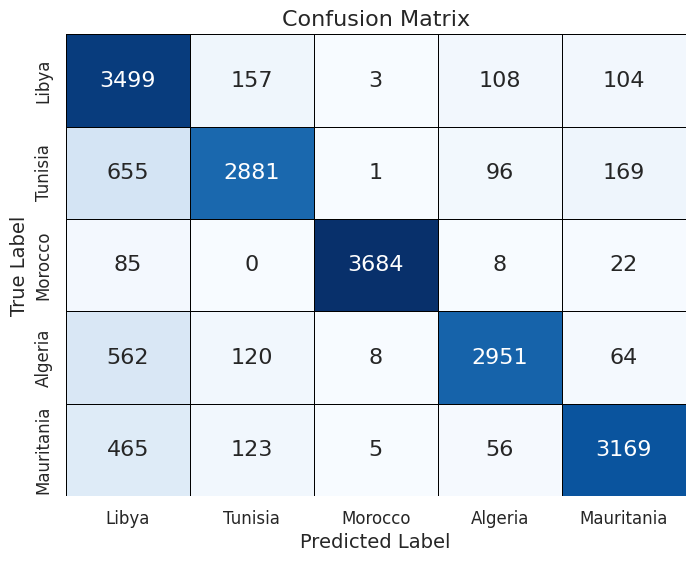

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch[0].to(device), batch[1].to(device)
        labels = labels.float()
        outputs, _ = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        y_true.extend(labels.cpu().detach().numpy())
        y_pred.extend(preds.cpu().detach().numpy())
test_acc = accuracy_score(y_true, y_pred)
test_f1 = f1_score(y_true, y_pred, average='macro')
test_pres = precision_score(y_true, y_pred, average='macro')
test_recall = recall_score(y_true, y_pred, average='macro')
y_true = np.argmax(y_true, axis=1)  # Convert to multiclass format
y_pred = np.argmax(y_pred, axis=1)  # Convert to multiclass format
test_confusion_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])
print('Test Accuracy: {:.4f}'.format(test_acc))
print('Test f1 score: {:.4f}'.format(test_f1))
print('Test precision: {:.4f}'.format(test_pres))
print('Test recall: {:.4f}'.format(test_recall))
# Create confusion matrix plot
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=0.5, linecolor='black', ax=ax)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
#'Tunisia','Algeria','Morocco','Libya','Mauritania'
ax.set_xticklabels(['Libya', 'Tunisia', 'Morocco', 'Algeria','Mauritania'], fontsize=12)
ax.set_yticklabels(['Libya', 'Tunisia', 'Morocco', 'Algeria','Mauritania'], fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()